In [13]:
!pip install pytrends
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()


In [14]:
pytrend.build_payload(kw_list = ["food near me","diet","gym","Health","Beach"],timeframe='2017-09-01 2021-03-17',geo='US')
df_A = pytrend.interest_over_time()

In [15]:
pytrend.build_payload(kw_list = ["diet pills","antidepressant"],timeframe='2017-09-01 2021-03-17',geo='US')
df_B = pytrend.interest_over_time()

In [16]:
df_C = pytrend.get_historical_interest(["food near me","Health","Beach"],year_start=2020, month_start=12, day_start=20, hour_start=0, year_end=2020, month_end=12, day_end=31, hour_end=0, cat=0, geo='US', sleep=240)

<AxesSubplot:title={'center':'Search Trends'}, xlabel='date'>

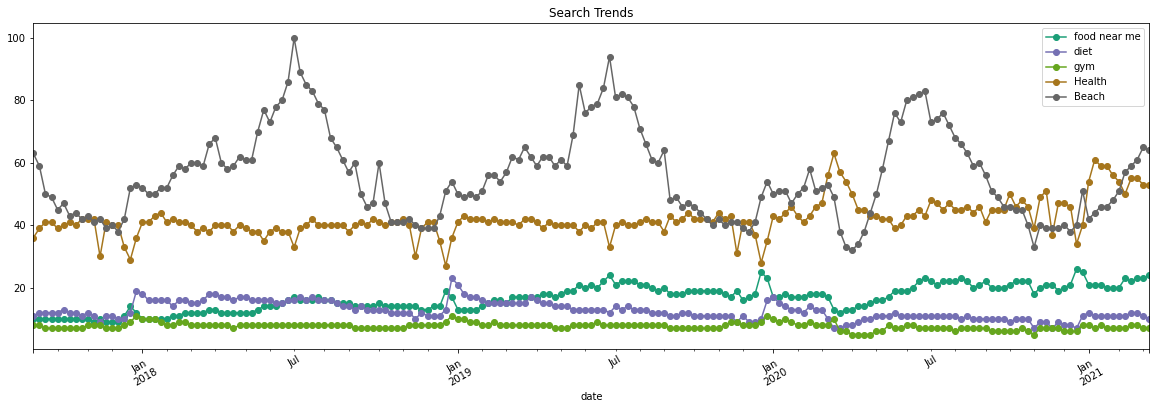

In [17]:
df_A.reset_index().plot(kind='line',x='date',title= 'Search Trends', style='-o', cmap='Dark2',figsize=(20,6), rot=30)

<AxesSubplot:title={'center':'Search Trends'}, xlabel='date'>

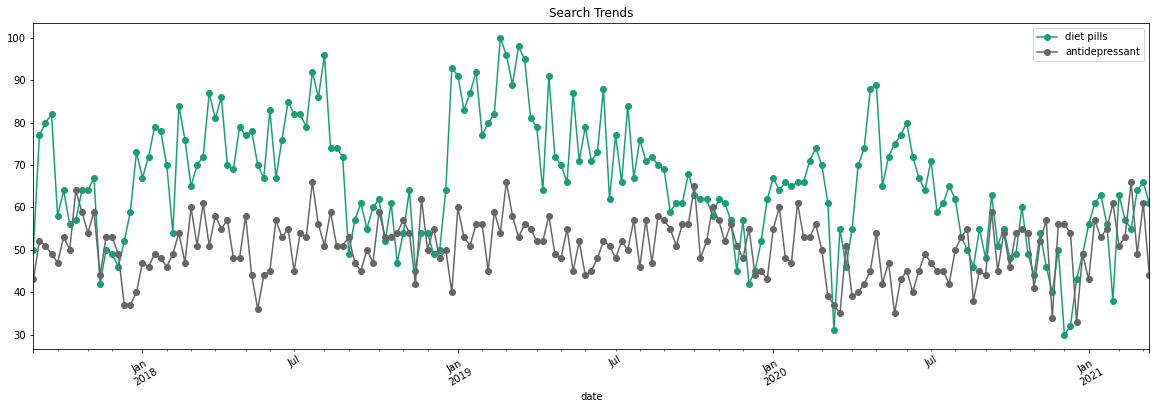

In [18]:
df_B.reset_index().plot(kind='line',x='date',title= 'Search Trends', style='-o', cmap='Dark2',figsize=(20,6), rot=30)

<AxesSubplot:title={'center':'Search Trends'}, xlabel='date'>

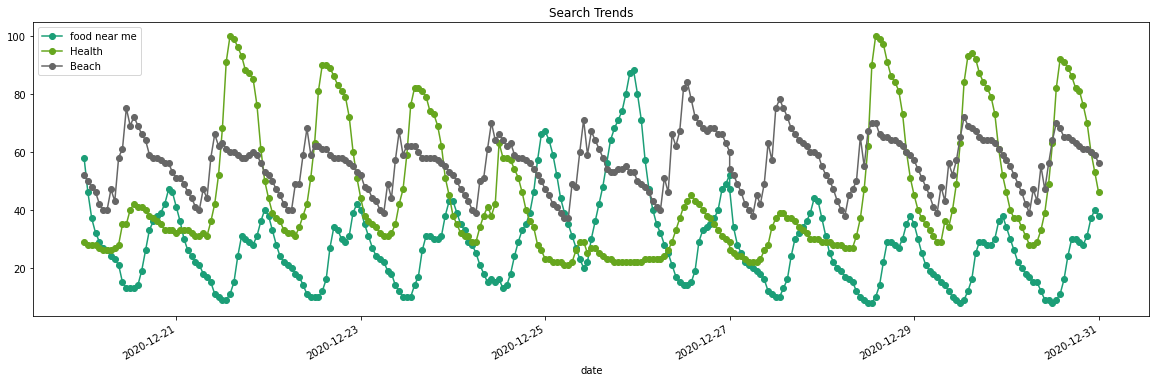

In [19]:
df_C.reset_index().plot(kind='line',x='date',title= 'Search Trends', style='-o', cmap='Dark2',figsize=(20,6), rot=30)

In [35]:
# New : head for df
df_A.head()

,food near me,diet,gym,Health,Beach,isPartial
date,,,,,,
2017-09-03,10,11,8,36,63,False
2017-09-10,10,12,8,39,59,False
2017-09-17,10,12,7,41,50,False
2017-09-24,10,12,7,41,49,False
2017-10-01,10,12,7,39,45,False


In [40]:
# suggestions: drop "isPartial column" ....
NewDF=df_A.drop('isPartial', axis=1)
NewDF.head()

,food near me,diet,gym,Health,Beach
date,,,,,
2017-09-03,10,11,8,36,63
2017-09-10,10,12,8,39,59
2017-09-17,10,12,7,41,50
2017-09-24,10,12,7,41,49
2017-10-01,10,12,7,39,45


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline
import scipy.stats as stats


In [42]:
# get average queries during those groupby dates
mean = NewDF.groupby('date')['diet'].mean()
median = NewDF.groupby('date')['diet'].median()
variance = NewDF.groupby('date')['diet'].var()
std = NewDF.groupby('date')['diet'].std()
sem = NewDF.groupby('date')['diet'].sem()

sumDF = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,"Stan. Dev": std,"SEM": sem})
sumDF

,Mean,Median,Variance,Stan. Dev,SEM
date,,,,,
2017-09-03,11,11,NaN,NaN,NaN
2017-09-10,12,12,NaN,NaN,NaN
2017-09-17,12,12,NaN,NaN,NaN
2017-09-24,12,12,NaN,NaN,NaN
2017-10-01,12,12,NaN,NaN,NaN
...,...,...,...,...,...
2021-02-14,11,11,NaN,NaN,NaN
2021-02-21,12,12,NaN,NaN,NaN
2021-02-28,12,12,NaN,NaN,NaN


<AxesSubplot:title={'center':'Median'}, xlabel='Mean'>

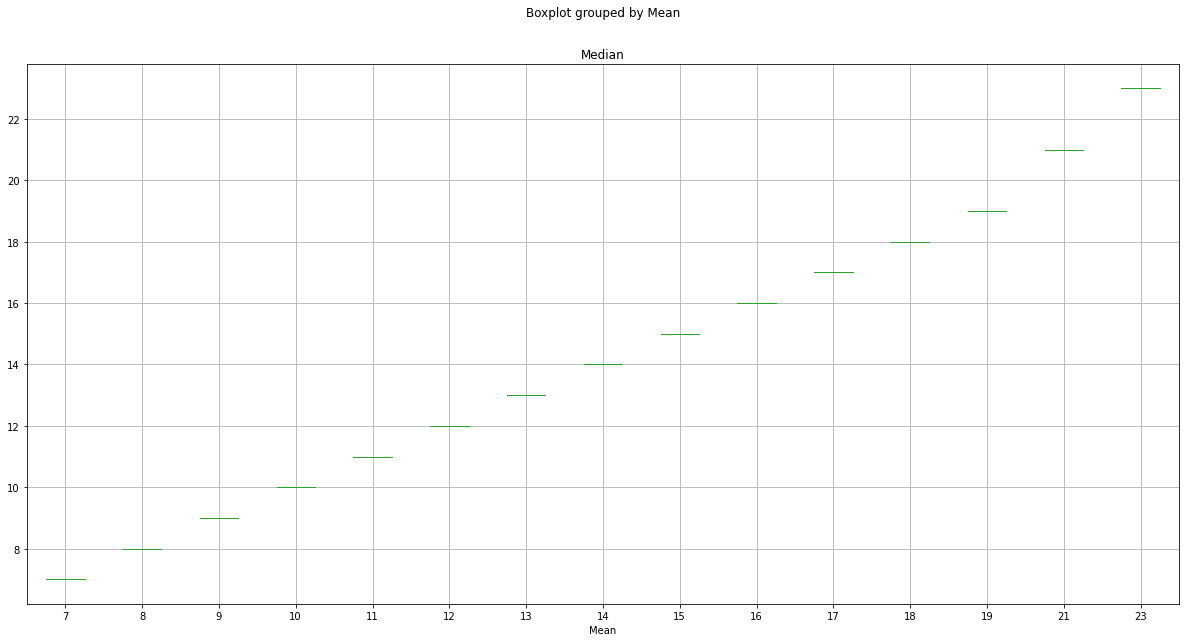

In [30]:
# Create a boxplot to compare means
sumDF.boxplot("Median", by="Mean", figsize=(20, 10))

In [ ]:
#If average Google queries for health increases during Holidays, 
    #then that is the best time for companies to advertise health products.  
    
#use code from Proj 7, lesson 3. 